In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda
import MDAnalysis.analysis.rdf as rdf


/home/hl4872/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/hl4872/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/hl4872/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/hl4872/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [3]:
# paths to files
energy_Water = '../Runs/Water/water-1.ener'
energy_Proton = '../Runs/Proton/proton_aimd_1ps_every0.5fs-1.ener'
traj_Water = '../Runs/Water/water-pos-1.xyz'
traj_Proton = '../Runs/Proton/proton_aimd_1ps_every0.5fs-pos-1.xyz'
top_Water = '../Runs/Water/water.xyz'
top_Proton = '../Runs/Proton/proton.xyz'

# box size
box = 12.42
# load data
energy_Water = np.loadtxt(energy_Water)
energy_Proton = np.loadtxt(energy_Proton)
u_Water = mda.Universe(top_Water,traj_Water)
u_Water.dimensions= np.array([box,box,box,90,90,90])
u_Proton = mda.Universe(traj_Proton, traj_Proton)
u_Proton.dimensions= np.array([box,box,box,90,90,90])


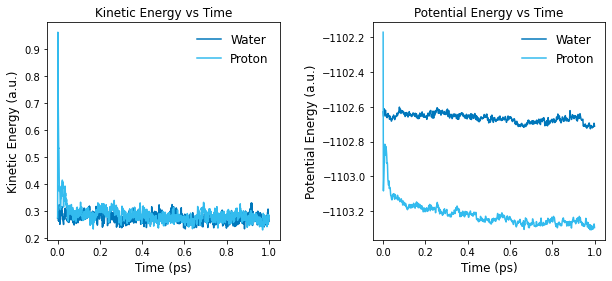

In [4]:
# figure 1 - energy versus time
ax, fig = plt.subplots(1,2,figsize=(10,4),gridspec_kw={'wspace':0.4})

# set colorblind-friendly palatte 
colors = ['#0077BB', '#33BBEE', '#009988', '#EE7733', '#CC3311', '#EE3377', '#BBBBBB']

# plot energy
fig[0].plot(energy_Water[:,1]/1000, energy_Water[:,2], color=colors[0], label='Water')
fig[0].plot(energy_Proton[:,1]/1000, energy_Proton[:,2], color=colors[1], label='Proton')
# title and labels
fig[0].set_title('Kinetic Energy vs Time')
fig[0].set_xlabel('Time (ps)',fontsize=12)
fig[0].set_ylabel('Kinetic Energy (a.u.)',fontsize=12)
# legend
fig[0].legend(fontsize=12, frameon=False)

# plot energy
fig[1].plot(energy_Water[:,1]/1000, energy_Water[:,4], color=colors[0], label='Water')
fig[1].plot(energy_Proton[:,1]/1000, energy_Proton[:,4], color=colors[1], label='Proton')
# title and labels
fig[1].set_title('Potential Energy vs Time')
fig[1].set_xlabel('Time (ps)',fontsize=12)
fig[1].set_ylabel('Potential Energy (a.u.)',fontsize=12)
# legend
fig[1].legend(fontsize=12, frameon=False)

# save figure as pdf in ../Figures
fname = '../Figures/fig1.energy verses time.pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')

In [5]:
# g(r) calculation with MDAnalysis
# select oxygen atoms
oxygens_Water = u_Water.select_atoms('name O')
oxygens_Proton = u_Proton.select_atoms('name O')
# calculate g(r) for water
g_Water = rdf.InterRDF(oxygens_Water,oxygens_Water,nbins=100, range=(0.0,box/2), verbose=True)
g_Proton = rdf.InterRDF(oxygens_Proton,oxygens_Proton,nbins=100, range=(0.0,box/2), verbose=True)
# run g(r) calculation
g_Water.run()
g_Proton.run()

  0%|          | 0/2001 [00:00<?, ?it/s]

/home/hl4872/.local/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:438: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time


  0%|          | 0/2001 [00:00<?, ?it/s]

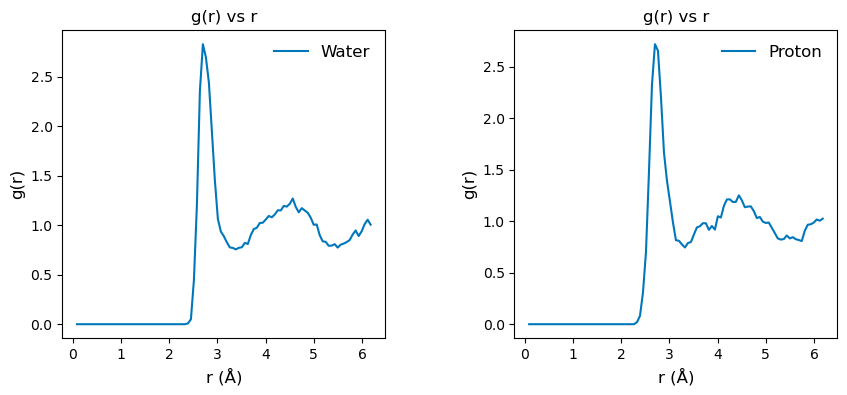

In [151]:
# figure 2 - g(r) versus r
ax, fig = plt.subplots(1,2,figsize=(10,4),gridspec_kw={'wspace':0.4})

# set colorblind-friendly palatte 
colors = ['#0077BB', '#33BBEE', '#009988', '#EE7733', '#CC3311', '#EE3377', '#BBBBBB']

# plot g(r)
fig[0].plot(g_Water.bins[1:], g_Water.rdf[1:], color=colors[0], label='Water')
fig[1].plot(g_Proton.bins[1:], g_Proton.rdf[1:], color=colors[0], label='Proton')
# title and labels
fig[0].set_title('g(r) vs r')
fig[0].set_xlabel('r (Å)',fontsize=12)
fig[0].set_ylabel('g(r)',fontsize=12)
fig[1].set_title('g(r) vs r')
fig[1].set_xlabel('r (Å)',fontsize=12)
fig[1].set_ylabel('g(r)',fontsize=12)
# legend
fig[0].legend(fontsize=12, frameon=False)
fig[1].legend(fontsize=12, frameon=False)


# save figure as pdf in ../Figures
fname = '../Figures/fig2.g(r) versus r.pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')